In [16]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
path = "PTSD.xlsx"
df = pd.read_excel(path)
df = df[~df["PCL_Strict3"].isna()]


In [18]:
features = [ "age", "highschool_diploma", "Hebrew", "dyslexia", "ADHD", "T1ETBE", "T1Acc1t",
                         "T1Acc1n", "T1bias", "T2Acc1t", "T2Acc1n", "T2bias", "state1", "state2", "trait1",
                         "trait2", "lot1", "lot2", "phq1", "phq2", "PCL1", "PCL2", "cd_risc1", "ptgi2",
                         "active_coping1", "planning1", "positive_reframing1", "acceptance1", "humor1",
                         "religion1", "emotional_support1", "instrumental_support1", "self_distraction1",
                         "denial1", "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1",
                         "active_coping2", "planning2", "positive_reframing2", "acceptance2", "humor2",
                         "religion2", "emotional_support2", "instrumental_support2","self_distraction2",
                         "denial2", "venting2", "substance_use2", "behavioral_disengagement2", "self_blame2",
                         "trauma_history8_1", "military_exposure_unit", "HML_5HTT", "HL_MAOA", "HML_NPY",
                         "COMT_Hap1_recode", "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", "Ashken_scale",
                         "Sephar_scale", "Unknown"]

In [19]:
numerical_features = [ "T1ETBE", "T1Acc1t", "T1Acc1n", "T1bias", "T2Acc1t","T2Acc1n", "T2bias", "state1", "state2",
                        "trait1", "trait2", "lot1", "lot2", "phq1", "phq2", "cd_risc1", "PCL1", "PCL2"]
categorical_features = [ "age", "highschool_diploma", "Hebrew", "dyslexia", "ADHD",   "ptgi2",
                    "active_coping1", "planning1", "positive_reframing1", "acceptance1", "humor1",
                    "religion1", "emotional_support1", "instrumental_support1", "self_distraction1",
                    "denial1", "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1",
                    "active_coping2", "planning2", "positive_reframing2", "acceptance2", "humor2",
                    "religion2", "emotional_support2", "instrumental_support2", "self_distraction2",
                    "denial2", "venting2", "substance_use2", "behavioral_disengagement2", "self_blame2",
                    "trauma_history8_1", "military_exposure_unit", "HML_5HTT", "HL_MAOA", "HML_NPY",
                    "COMT_Hap1_recode", "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", "Ashken_scale",
                    "Sephar_scale", "Unknown"]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numerical_features] = imp.fit_transform(df[numerical_features])

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[categorical_features] = imp.fit_transform(df[categorical_features])

X = df[features]
Y = df["PCL_Strict3"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=271828, stratify=Y)


In [21]:
sm = SMOTE(random_state=27)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [22]:
pca = PCA(n_components = 0.99)
X_train_res = pca.fit_transform(X_train_res)

In [23]:
#clf = CalibratedClassifierCV(RandomForestClassifier())
# clf = LogisticRegression()
clf = RandomForestClassifier()
score = cross_val_score(clf, X_train_res, y_train_res, scoring="f1")
print("score", score)
clf.fit(X_train_res, y_train_res)
X_train = pca.transform(X_train)
y_pred = clf.predict(X_train)
print("recall_score", recall_score(y_pred,y_train))
print("precision_score",precision_score(y_pred,y_train))
print("accuracy_score",accuracy_score(y_pred,y_train))
print("f1_score",f1_score(y_pred,y_train))
print("roc_auc_score",roc_auc_score(y_pred,y_train))


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The d

score [0.93157895 0.95561358 0.93229167]
recall_score 0.9736842105263158
precision_score 1.0
accuracy_score 0.9983766233766234
f1_score 0.9866666666666666
roc_auc_score 0.986842105263158


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


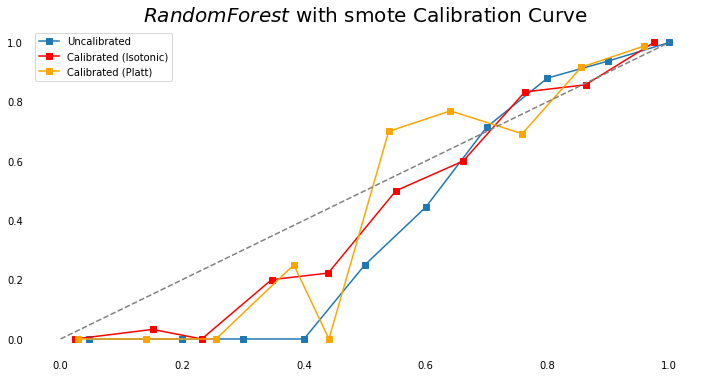

In [24]:
X_train_for_cal, X_test_for_cal, y_train_for_cal, y_test_for_cal = train_test_split(X_train_res, y_train_res, random_state=42)

fig, ax = plt.subplots(1, figsize=(12, 6))

# Uncalibrated
clf = RandomForestClassifier()
clf.fit(X_train_for_cal, y_train_for_cal)
y_test_predict_proba = clf.predict_proba(X_test_for_cal)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_for_cal, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Uncalibrated')

# Calibrated
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='isotonic')
clf_sigmoid.fit(X_train_for_cal, y_train_for_cal)
y_test_predict_proba = clf_sigmoid.predict_proba(X_test_for_cal)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_for_cal, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Calibrated (Isotonic)')

# Calibrated, Platt
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='sigmoid')
clf_sigmoid.fit(X_train_for_cal, y_train_for_cal)
y_test_predict_proba = clf_sigmoid.predict_proba(X_test_for_cal)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_for_cal, y_test_predict_proba, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibrated (Platt)')


plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("$RandomForest$ with smote Calibration Curve", fontsize=20); pass


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


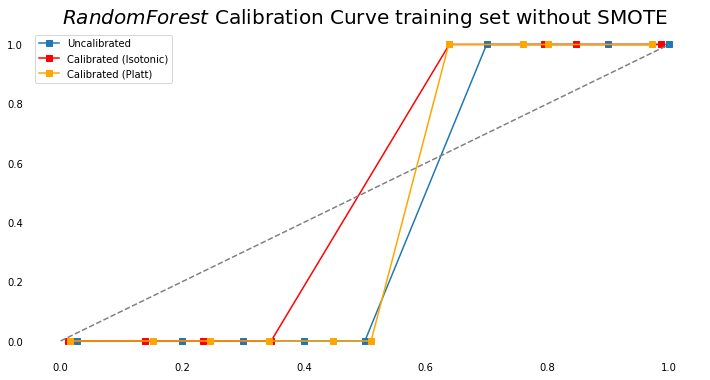

In [25]:
fig, ax = plt.subplots(1, figsize=(12, 6))

# Uncalibrated
clf = RandomForestClassifier()
clf.fit(X_train_res, y_train_res)
y_test_predict_proba = clf.predict_proba(X_train)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_train, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Uncalibrated')

# Calibrated
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='isotonic')
clf_sigmoid.fit(X_train_res, y_train_res)
y_test_predict_proba = clf_sigmoid.predict_proba(X_train)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_train, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Calibrated (Isotonic)')

# Calibrated, Platt
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='sigmoid')
clf_sigmoid.fit(X_train_res, y_train_res)
y_test_predict_proba = clf_sigmoid.predict_proba(X_train)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_train, y_test_predict_proba, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibrated (Platt)')


plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("$RandomForest$ Calibration Curve training set without SMOTE", fontsize=20); pass
